In [30]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn import ReLU
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
#to use gps for mac 
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using device : {device}")

Using device : mps


In [32]:
df = pd.read_csv('iris.csv')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [35]:
df.shape

(150, 5)

In [36]:
X = df.drop(columns=['species'])

In [37]:
X.shape

(150, 4)

In [38]:
y_df = df['species']

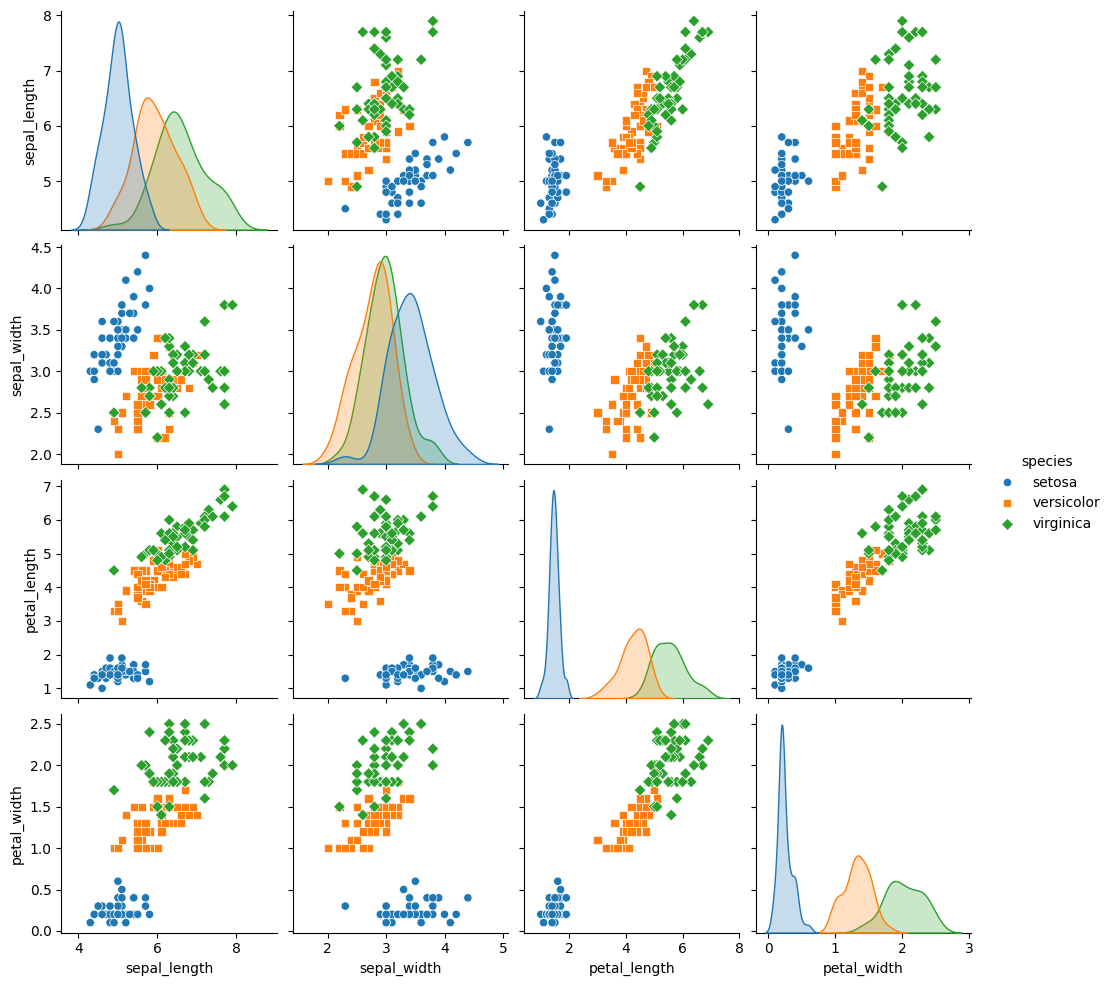

In [39]:
sns.pairplot(data=df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

In [40]:
X = X.to_numpy()

In [41]:
#to convert species name from catergory to number like 0,1 etc.
lableEncoder = LabelEncoder()
y = lableEncoder.fit_transform(y = y_df) 

/var/folders/q6/qg375stj7lq_4nrxnhkcq9280000gn/T/ipykernel_5493/1076445283.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


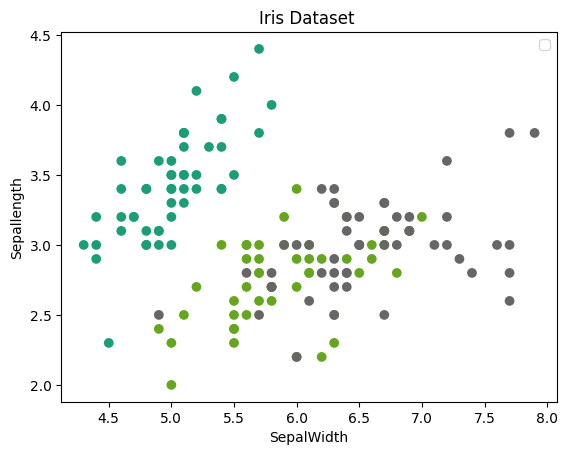

In [42]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.Dark2);
plt.ylabel("Sepallength")
plt.xlabel("SepalWidth")
plt.title("Iris Dataset ")
plt.legend()
plt.show()

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#convert nd array to torch tensor type

In [45]:
print("After ",type(X), type(y))

After  <class 'torch.Tensor'> <class 'torch.Tensor'>


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
X_test.shape, y_test.shape

torch.Size([120, 4]) torch.Size([120])


(torch.Size([30, 4]), torch.Size([30]))

In [47]:
class IrissModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=4, out_features=20)
        self.layer2 = nn.Linear(in_features=20, out_features=20)
        self.layer3 = nn.Linear(in_features=20, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [48]:
model0 = IrissModel()
model0.to(device)
next(model0.parameters()).device

device(type='mps', index=0)

In [49]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0454,  0.2520, -0.0395, -0.2024],
                      [-0.2189,  0.0441, -0.2451,  0.0991],
                      [-0.1093, -0.2650, -0.4922, -0.0307],
                      [-0.3266,  0.0453,  0.3238,  0.1387],
                      [-0.0868, -0.2519,  0.1824, -0.4087],
                      [-0.2907,  0.0188, -0.0575, -0.0857],
                      [-0.3024, -0.3816,  0.2012, -0.0805],
                      [ 0.3306, -0.2985, -0.1249,  0.0262],
                      [ 0.1821,  0.3871,  0.2271,  0.3807],
                      [ 0.0104,  0.1100,  0.4713, -0.0176],
                      [ 0.3257, -0.3250, -0.2787, -0.0247],
                      [ 0.0067,  0.1548, -0.1624, -0.2146],
                      [ 0.3093, -0.1525, -0.2840,  0.1102],
                      [ 0.2120, -0.3831, -0.4940, -0.3043],
                      [ 0.0606, -0.1937,  0.4033, -0.0797],
                      [-0.2270,  0.2185, -0.0242, -0.3455],
         

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr=0.001)

In [51]:
def accuracy_fn(y_true, y_pred):


    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc 

In [52]:
epochs = 10000
torch.manual_seed(42)
trainLossList = []
testLossList = []

y_train = y_train.long()
y_test = y_test.long()

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model0.train()

    # 1. Forward pass 
    y_logits = model0(X_train)
    y_preds = torch.argmax(y_logits, dim=1)

    # 2. Compute training loss
    loss = loss_fn(y_logits, y_train)

    # 3. Zero grad the optimizer
    optimizer.zero_grad()

    # 4. Loss backward -> backpropagate
    loss.backward()

    #5. Step the optimizer
    optimizer.step()

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    ### Testing
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test)
        test_preds = torch.argmax(test_logits, dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch}| Train Loss: {loss:.4f}| Train Acc: {acc}| Test Loss: {test_loss:.4f}| Test Acc: {test_acc}")

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch: 0| Train Loss: 1.1660| Train Acc: 32.5| Test Loss: 1.1157| Test Acc: 36.666666666666664
Epoch: 10| Train Loss: 1.0833| Train Acc: 32.5| Test Loss: 1.0595| Test Acc: 36.666666666666664
Epoch: 20| Train Loss: 1.0422| Train Acc: 32.5| Test Loss: 1.0313| Test Acc: 36.666666666666664
Epoch: 30| Train Loss: 1.0119| Train Acc: 40.833333333333336| Test Loss: 1.0016| Test Acc: 40.0
Epoch: 40| Train Loss: 0.9794| Train Acc: 34.166666666666664| Test Loss: 0.9640| Test Acc: 36.666666666666664
Epoch: 50| Train Loss: 0.9423| Train Acc: 61.66666666666667| Test Loss: 0.9258| Test Acc: 70.0
Epoch: 60| Train Loss: 0.8970| Train Acc: 65.83333333333333| Test Loss: 0.8802| Test Acc: 70.0
Epoch: 70| Train Loss: 0.8419| Train Acc: 70.83333333333334| Test Loss: 0.8236| Test Acc: 70.0
Epoch: 80| Train Loss: 0.7752| Train Acc: 73.33333333333333| Test Loss: 0.7558| Test Acc: 80.0
Epoch: 90| Train Loss: 0.7035| Train Acc: 77.5| Test Loss: 0.6837| Test Acc: 80.0
Epoch: 100| Train Loss: 0.6316| Train Acc: 82

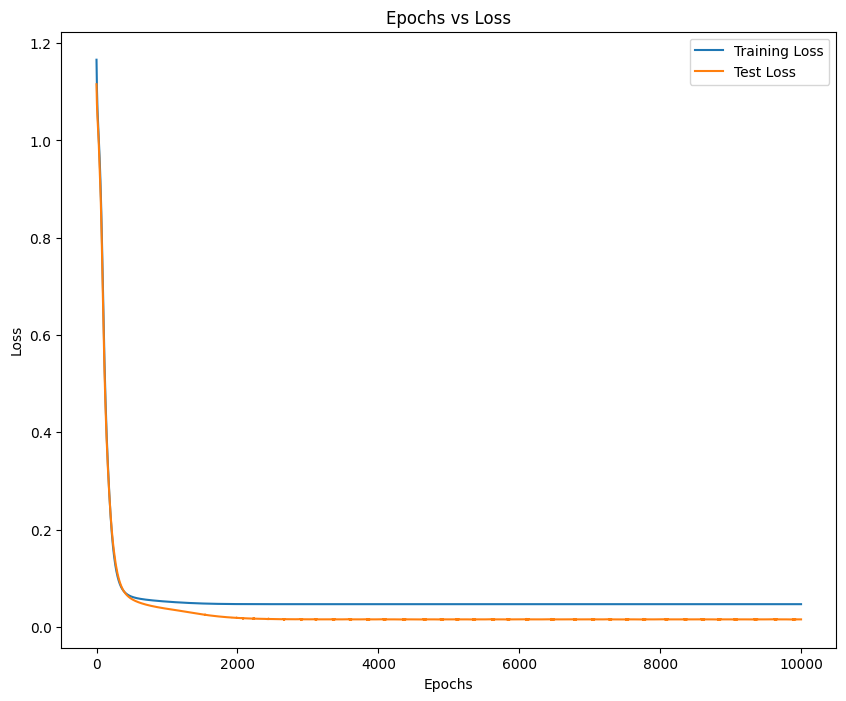

In [53]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();

In [54]:
model0.eval()
with torch.inference_mode():
    test_logits = model0(X_test)
    y_preds = torch.argmax(test_logits, dim=1)
print(y_preds)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0], device='mps:0')


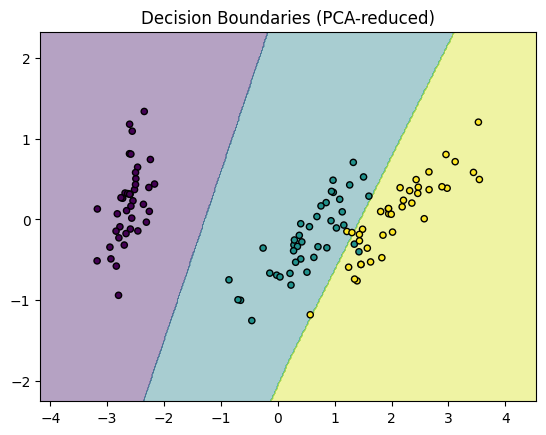

In [55]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.cpu().numpy())

# Create meshgrid
h = 0.02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
device = "cpu"
model0.eval()
device = "mps"
next(model0.parameters()).device
with torch.inference_mode():
    Z = model0(torch.tensor(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]), 
                           dtype=torch.float32).to(device))
    Z = Z.argmax(dim=1).cpu().numpy()

# Plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.cpu(), s=20, edgecolor='k')
plt.title('Decision Boundaries (PCA-reduced)')
plt.show()

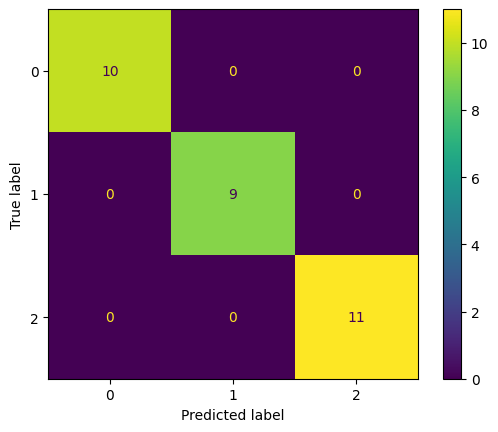

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test.to("cpu"), y_pred=y_preds.to("cpu"))
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()